## Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### Loading Model

In [2]:
model  = tf.keras.models.load_model('trained_model.keras')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_11 (Conv2D)          (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 conv2d_13 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

### Visualizaing Single Image of Test set

In [4]:
!pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   -- ------------------------------------- 2.1/39.5 MB 16.8 MB/s eta 0:00:03
   ----- ---------------------------------- 5.5/39.5 MB 17.7 MB/s eta 0:00:02
   --------- ------------------------------ 9.2/39.5 MB 16.3 MB/s eta 0:00:02
   ------------ --------------------------- 12.6/39.5 MB 16.8 MB/s eta 0:00:02
   --------------- ------------------------ 15.7/39.5 MB 16.2 MB/s eta 0:00:02
   ------------------ --------------------- 18.4/39.5 MB 15.2 MB/s eta 0:00:02
   ---------------------- ----------------- 21.8/39.5 MB 15.3 MB/s eta 0:00:02
   ------------------------- -------------- 24.9/39.5 MB 15.3 MB/s eta 0:00:01
   ----------------------------- ---------- 28.8/39.5 MB 15.6 MB/s eta 0:00:01
   --------------------------------- ------ 33.0/39.5 MB 16.0 MB/s eta 0:00:01
   ------------------------------------- -- 37.0/39.5 MB 16.2 MB/s eta 0:00:01
   ---------------------------------------  39.3/39.5 MB 16.0 MB

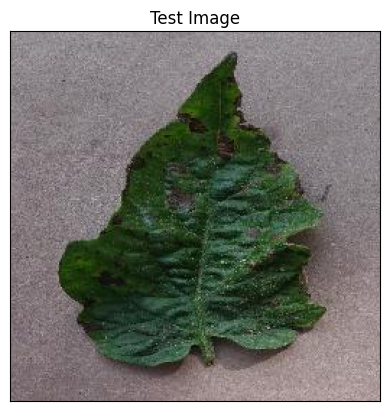

In [18]:
import cv2
image_path = "test/test/TomatoEarlyBlight3.JPG"
#Reading Image
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Convert BGR image to RGB

#Displaying Image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [21]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr]) #Convert single image to a batch
print(input_arr.shape)

(1, 128, 128, 3)


In [22]:
prediction = model.predict(input_arr)
prediction,prediction.shape

1/1 [==============================] - 0s 27ms/step


(array([[2.60786260e-06, 5.50189952e-07, 1.27169396e-05, 1.24891652e-02,
         1.18807548e-05, 2.37782160e-06, 3.80720337e-07, 2.19394315e-06,
         2.96088078e-08, 8.31949649e-07, 6.79821284e-08, 7.92296196e-05,
         1.25073001e-03, 9.35209682e-05, 7.41398765e-07, 6.65961306e-06,
         2.23169536e-06, 1.61542957e-07, 4.32433262e-06, 5.79955122e-06,
         7.18463525e-07, 7.32111279e-04, 8.06303360e-05, 1.01343961e-04,
         3.83653183e-04, 1.03110315e-05, 1.97550362e-05, 2.81420012e-06,
         9.76521755e-04, 9.31290150e-01, 5.94166413e-05, 3.52786941e-04,
         3.28878756e-04, 1.26092613e-03, 4.06241789e-03, 4.59982343e-02,
         3.68893059e-04, 4.21766617e-06]], dtype=float32),
 (1, 38))

In [23]:
result_index = np.argmax(prediction)
result_index

29

In [24]:
class_name = ['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

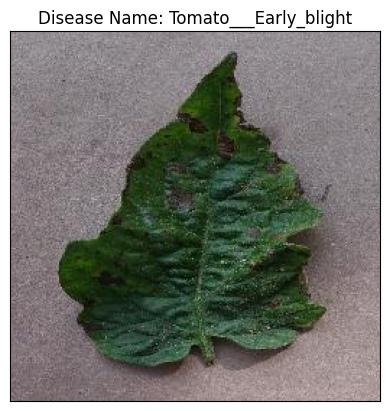

In [25]:
#Displaying Result of disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

In [26]:
model_prediction

'Tomato___Early_blight'